from sklearnex import patch_sklearn
patch_sklearn()

# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

In [4]:
y.describe()

count    200.000000
mean       0.500000
std        0.501255
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
dtype: float64

In [5]:
target_label = 1.0

# Train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True, stratify=y)

# Experiment

In [7]:
from PineBioML.model.utils import Pine, sklearn_esitimator_wrapper, data_source

from PineBioML.preprocessing import Normalizer, Pass
from PineBioML.preprocessing.impute import knn_imputer, simple_imputer, interative_imputer
from PineBioML.preprocessing.utils import feature_extension
from PineBioML.preprocessing.outlier import IsolationForest, simple_clip
from PineBioML.selection.classification import ensemble_selector
from PineBioML.model.supervised import Classification
from sklearn.linear_model import LogisticRegression


# define the experiment pipeline
experiment = [
    ("DataSource", {
        "first256": data_source(x_train.iloc[:, :50], x_valid.iloc[:, :50]),
        "others": data_source(x_train.iloc[:, 50:], x_valid.iloc[:, 50:])
    }),
    ("OutlierDetection", {
        "Simple clip": simple_clip(),
        "None": Pass()}),
    ("MissingValueProcessing", {
        "mean": simple_imputer(threshold=0.3333, strategy="mean")
    }),
    ("Standarization", {
        "StandardScaler": Normalizer(method="StandardScaler"),
    }),
    ("Selection",{
        "ensemble": ensemble_selector(z_importance_threshold=1),
        #"None": Pass()
    }),
    ("Modeling", {
        "LgisticRegression":
        sklearn_esitimator_wrapper(LogisticRegression(penalty=None)),
        "ElasticLogisticRegression":
        Classification.ElasticLogit_tuner(target="auc"),
        "rbf-SVM":
        Classification.SVM_tuner(target="acc"),
        "DecistionTree":
        Classification.DecisionTree_tuner(target="auc"),
        "RandomForest":
        Classification.RandomForest_tuner(target="auc"),
        "AdaBoost":
        Classification.AdaBoost_tuner(target="auc"),
        "XGBoost":
        Classification.XGBoost_tuner(target="auc"),
        "LightGBM":
        Classification.LightGBM_tuner(target="auc"),
    }),
]

In [8]:
pine_automl = Pine(experiment, target_label = target_label, cv_result= True, evaluate_ncv = 3)
result = pine_automl.do_experiment(x_train, y_train, x_valid, y_valid)

Using  c45  to select.


100%|██████████| 50/50 [00:03<00:00, 14.32it/s]


c45  is done. Using 3.6244

Using  RF_gini  to select.
RF_gini  is done. Using 0.2092

Using  Lasso  to select.
Lasso  is done. Using 0.0267

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 0.0770

Using  SVM  to select.
SVM  is done. Using 0.0080

optuna seed 5902  |  validation seed 14156  |  model seed 11995
    ElasticNetLogisticRegression start tuning. it will take a while.
    default is better.
optuna seed 6800  |  validation seed 8874  |  model seed 5675
    SVM start tuning. it will take a while.
    optuna is better, best trial:  11
optuna seed 12410  |  validation seed 6833  |  model seed 10725
    DecisionTree start tuning. it will take a while.
    optuna is better, best trial:  20
optuna seed 7982  |  validation seed 1744  |  model seed 1489
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  45
optuna seed 2609  |  validation seed 9559  |  model seed 7221
    AdaBoost start tuning. it will take a while.
    optuna is better,

100%|██████████| 50/50 [00:00<00:00, 789.37it/s]


c45  is done. Using 0.1419

Using  RF_gini  to select.
RF_gini  is done. Using 0.0707

Using  Lasso  to select.
Lasso  is done. Using 0.0200

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 0.0679

Using  SVM  to select.
SVM  is done. Using 0.0050

optuna seed 5902  |  validation seed 14156  |  model seed 11995
    ElasticNetLogisticRegression start tuning. it will take a while.
    optuna is better, best trial:  17
optuna seed 6800  |  validation seed 8874  |  model seed 5675
    SVM start tuning. it will take a while.
    optuna is better, best trial:  24
optuna seed 12410  |  validation seed 6833  |  model seed 10725
    DecisionTree start tuning. it will take a while.
    optuna is better, best trial:  24
optuna seed 7982  |  validation seed 1744  |  model seed 1489
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  34
optuna seed 2609  |  validation seed 9559  |  model seed 7221
    AdaBoost start tuning. it will take a while.
    op

100%|██████████| 50/50 [00:00<00:00, 530.20it/s]

c45  is done. Using 0.1877

Using  RF_gini  to select.


RF_gini  is done. Using 0.0897

Using  Lasso  to select.
Lasso  is done. Using 0.0240

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 0.0803

Using  SVM  to select.
SVM  is done. Using 0.0070

optuna seed 5902  |  validation seed 14156  |  model seed 11995
    ElasticNetLogisticRegression start tuning. it will take a while.
    optuna is better, best trial:  19
optuna seed 6800  |  validation seed 8874  |  model seed 5675
    SVM start tuning. it will take a while.
    optuna is better, best trial:  18
optuna seed 12410  |  validation seed 6833  |  model seed 10725
    DecisionTree start tuning. it will take a while.
    optuna is better, best trial:  2
optuna seed 7982  |  validation seed 1744  |  model seed 1489
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  49
optuna seed 2609  |  validation seed 9559  |  model seed 7221
    AdaBoost start tuning. it will take a while.
    optuna is better, best trial:  15
optuna seed 4679  |  val

100%|██████████| 50/50 [00:00<00:00, 773.11it/s]


c45  is done. Using 0.1268

Using  RF_gini  to select.
RF_gini  is done. Using 0.0824

Using  Lasso  to select.
Lasso  is done. Using 0.0216

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 0.0647

Using  SVM  to select.
SVM  is done. Using 0.0030

optuna seed 5902  |  validation seed 14156  |  model seed 11995
    ElasticNetLogisticRegression start tuning. it will take a while.
    optuna is better, best trial:  23
optuna seed 6800  |  validation seed 8874  |  model seed 5675
    SVM start tuning. it will take a while.
    optuna is better, best trial:  8
optuna seed 12410  |  validation seed 6833  |  model seed 10725
    DecisionTree start tuning. it will take a while.
    optuna is better, best trial:  2
optuna seed 7982  |  validation seed 1744  |  model seed 1489
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  15
optuna seed 2609  |  validation seed 9559  |  model seed 7221
    AdaBoost start tuning. it will take a while.
    optu

In [9]:
import pandas as pd
pd.DataFrame(pine_automl.result)

,DataSource,OutlierDetection,MissingValueProcessing,Standarization,Selection,Modeling,train_sensitivity,train_f1,train_specificity,train_auc,...,cv_mcc,cv_accuracy,cv_support,test_sensitivity,test_f1,test_specificity,test_auc,test_mcc,test_accuracy,test_support
0,first256,Simple clip,mean,StandardScaler,ensemble,LgisticRegression,0.746269,0.740741,0.731343,0.822678,...,0.505191,0.746128,44.666667,0.636364,0.591549,0.484848,0.680441,0.122628,0.560606,66
1,first256,Simple clip,mean,StandardScaler,ensemble,ElasticLogisticRegression,0.746269,0.740741,0.731343,0.823346,...,0.505191,0.746128,44.666667,0.636364,0.591549,0.484848,0.681359,0.122628,0.560606,66
2,first256,Simple clip,mean,StandardScaler,ensemble,rbf-SVM,0.776119,0.753623,0.716418,0.822900,...,0.505191,0.746128,44.666667,0.727273,0.640000,0.454545,0.685950,0.188982,0.590909,66
3,first256,Simple clip,mean,StandardScaler,ensemble,DecistionTree,0.746269,0.775194,0.820896,0.890956,...,0.335223,0.648990,44.666667,0.575758,0.575758,0.575758,0.654729,0.151515,0.575758,66
4,first256,Simple clip,mean,StandardScaler,ensemble,RandomForest,0.835821,0.829630,0.820896,0.900646,...,0.329453,0.656734,44.666667,0.696970,0.647887,0.545455,0.695592,0.245256,0.621212,66
5,first256,Simple clip,mean,StandardScaler,ensemble,AdaBoost,0.910448,0.748466,0.477612,0.820450,...,0.296487,0.641919,44.666667,0.939394,0.746988,0.424242,0.681359,0.424264,0.681818,66
6,first256,Simple clip,mean,StandardScaler,ensemble,XGBoost,0.850746,0.838235,0.820896,0.928158,...,0.378636,0.686532,44.666667,0.666667,0.628571,0.545455,0.642332,0.213697,0.606061,66
7,first256,Simple clip,mean,StandardScaler,ensemble,LightGBM,0.925373,0.898551,0.865672,0.965137,...,0.274254,0.634848,44.666667,0.727273,0.685714,0.606061,0.688246,0.335809,0.666667,66
8,first256,None,mean,StandardScaler,ensemble,LgisticRegression,0.791045,0.773723,0.746269,0.842727,...,0.482227,0.739057,44.666667,0.606061,0.615385,0.636364,0.712580,0.242536,0.621212,66
9,first256,None,mean,StandardScaler,ensemble,ElasticLogisticRegression,0.791045,0.773723,0.746269,0.842949,...,0.496720,0.746465,44.666667,0.606061,0.615385,0.636364,0.713499,0.242536,0.621212,66


In [10]:
pine_automl.experiment_detail()

,parameter,dtype,lower_bound,upper_bound,result
ElasticNetLogisticRegression,None,None,None,None,None
,C,float,0.000001,100.0,83.620861
,l1_ratio,float,0,1,0.842559
SVM,None,None,None,None,None
,kernel,category,"[linear, poly, rbf, sigmoid]",None,linear
,C,float,0.011576,1157.58369,161.567198
DecisionTree,None,None,None,None,None
,max_depth,int,4,9,4.0
,min_samples_split,int,2,32,31.0
,min_samples_leaf,int,1,16,8.0


In [11]:
# print the results, sort according to test_auc
result.sort_values("test_auc")

,DataSource,OutlierDetection,MissingValueProcessing,Standarization,Selection,Modeling,train_sensitivity,train_f1,train_specificity,train_auc,...,cv_mcc,cv_accuracy,cv_support,test_sensitivity,test_f1,test_specificity,test_auc,test_mcc,test_accuracy,test_support
19,others,Simple clip,mean,StandardScaler,ensemble,DecistionTree,0.552239,0.654867,0.865672,0.800067,...,0.296243,0.634343,44.666667,0.212121,0.254545,0.545455,0.402663,-0.257130,0.378788,66
21,others,Simple clip,mean,StandardScaler,ensemble,AdaBoost,0.761194,0.761194,0.761194,0.825574,...,0.211489,0.604714,44.666667,0.454545,0.454545,0.454545,0.454545,-0.090909,0.454545,66
20,others,Simple clip,mean,StandardScaler,ensemble,RandomForest,1.000000,0.985294,0.970149,1.000000,...,0.241417,0.619360,44.666667,0.575758,0.506667,0.303030,0.462351,-0.125988,0.439394,66
29,others,None,mean,StandardScaler,ensemble,AdaBoost,0.776119,0.753623,0.716418,0.863667,...,0.182960,0.589562,44.666667,0.606061,0.547945,0.393939,0.487603,0.000000,0.500000,66
18,others,Simple clip,mean,StandardScaler,ensemble,rbf-SVM,0.671642,0.638298,0.567164,0.686122,...,0.124142,0.559091,44.666667,0.484848,0.492308,0.515152,0.504132,0.000000,0.500000,66
31,others,None,mean,StandardScaler,ensemble,LightGBM,1.000000,1.000000,1.000000,1.000000,...,0.179183,0.589562,44.666667,0.454545,0.461538,0.484848,0.516070,-0.060634,0.469697,66
23,others,Simple clip,mean,StandardScaler,ensemble,LightGBM,0.955224,0.948148,0.940299,0.986634,...,0.182135,0.589394,44.666667,0.575758,0.527778,0.393939,0.521579,-0.030817,0.484848,66
17,others,Simple clip,mean,StandardScaler,ensemble,ElasticLogisticRegression,0.611940,0.611940,0.611940,0.689686,...,0.136020,0.567340,44.666667,0.393939,0.419355,0.515152,0.525253,-0.091584,0.454545,66
16,others,Simple clip,mean,StandardScaler,ensemble,LgisticRegression,0.611940,0.611940,0.611940,0.689463,...,0.136020,0.567340,44.666667,0.393939,0.419355,0.515152,0.526171,-0.091584,0.454545,66
28,others,None,mean,StandardScaler,ensemble,RandomForest,0.895522,0.902256,0.910448,0.986634,...,0.240929,0.619529,44.666667,0.393939,0.456140,0.666667,0.527089,0.062994,0.530303,66


In [12]:
# save the result
result.to_csv("./output/example_Pine_result.csv")

# Pick a model and save it

In [16]:
# notice that the model is not fitted yet
model = pine_automl.recall_model(id = 10)

In [17]:
# fit the model
model.fit(x_train, y_train)
y_valid_prob = model.predict_proba(x_valid)

Using  c45  to select.


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 801.83it/s]

c45  is done. Using 0.1133

Using  RF_gini  to select.
RF_gini  is done. Using 0.0516

Using  Lasso  to select.
Lasso  is done. Using 0.0160

Using  multi_Lasso  to select.


multi_Lasso  is done. Using 0.0533

Using  SVM  to select.
SVM  is done. Using 0.0040

optuna seed 6800  |  validation seed 8874  |  model seed 5675
    SVM start tuning. it will take a while.
    optuna is better, best trial:  24


c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### summary

             precision    recall  f1-score support
0.0           0.606061  0.606061  0.606061    33.0
1.0           0.606061  0.606061  0.606061    33.0
                                                  
macro avg     0.606061  0.606061  0.606061    66.0
weighted avg  0.606061  0.606061  0.606061    66.0
accuracy                          0.606061    66.0
sensitivity                       0.606061    33.0
specificity                       0.606061    33.0


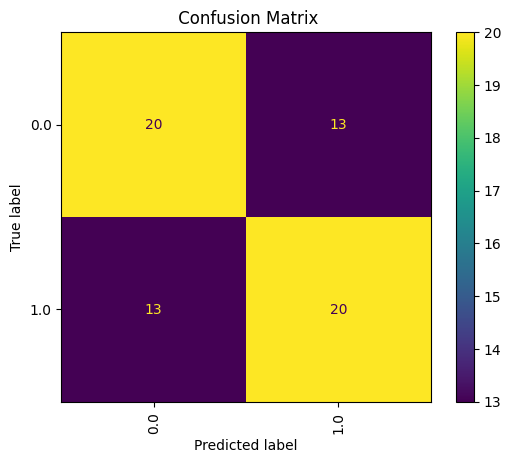

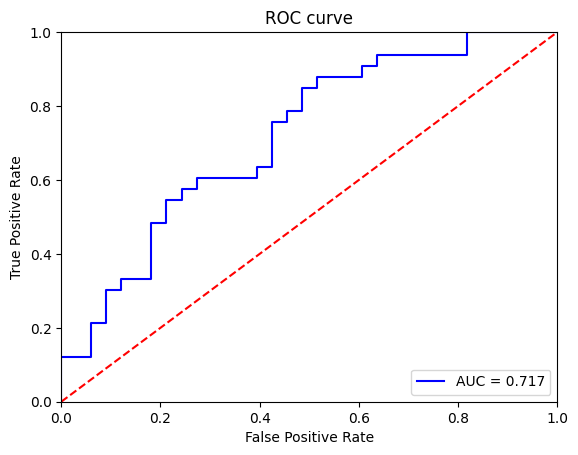

In [18]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, y_valid_prob, target_label=target_label, save_fig=True, save_path="./output/images")

### save the model

IO.save_model(model, "./output/models/", "mode0", overide=True)